# 정렬 (Sorting)

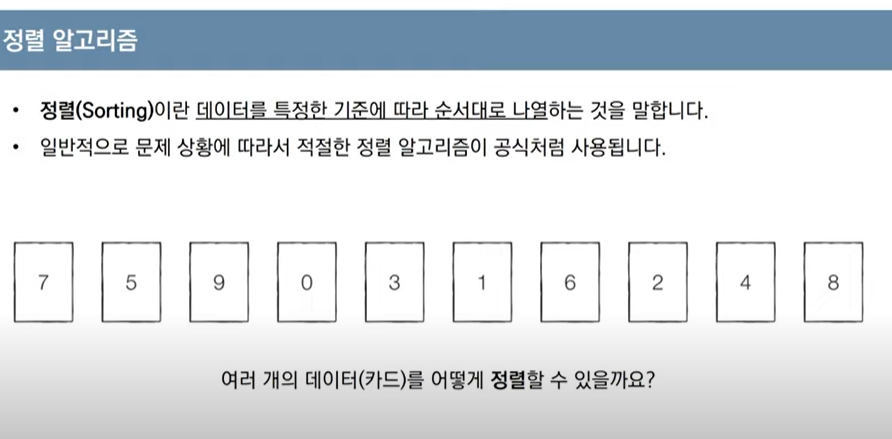

## 선택정렬

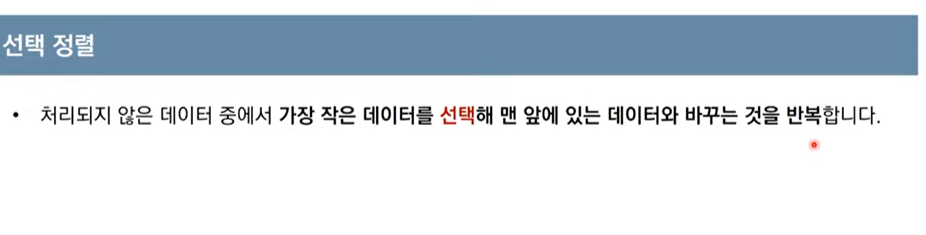
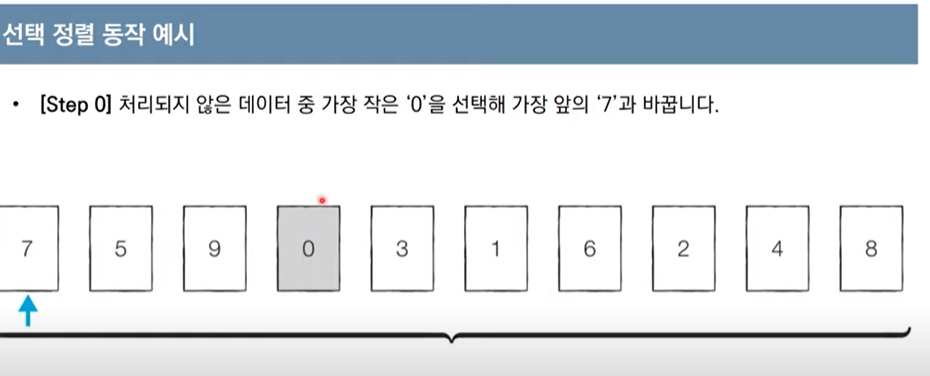
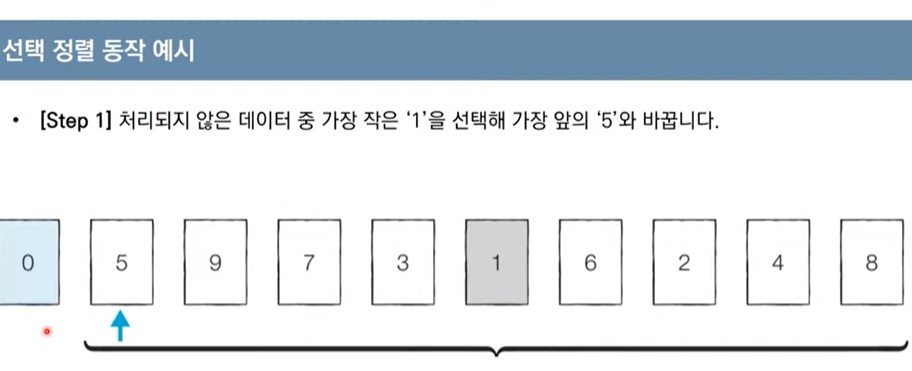
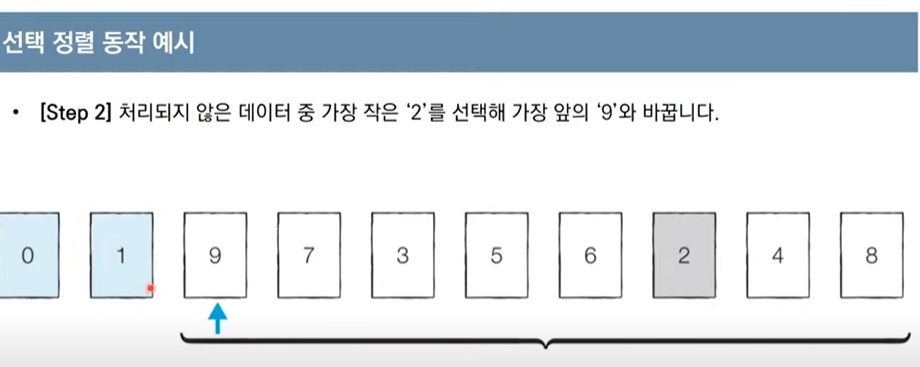
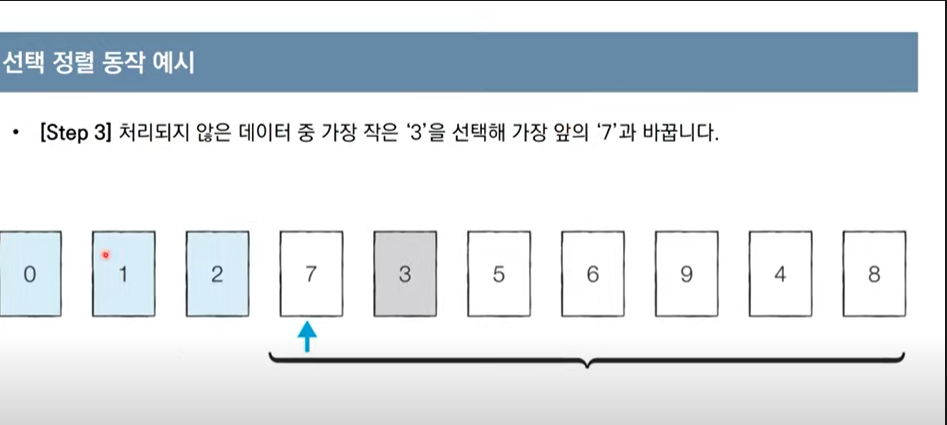
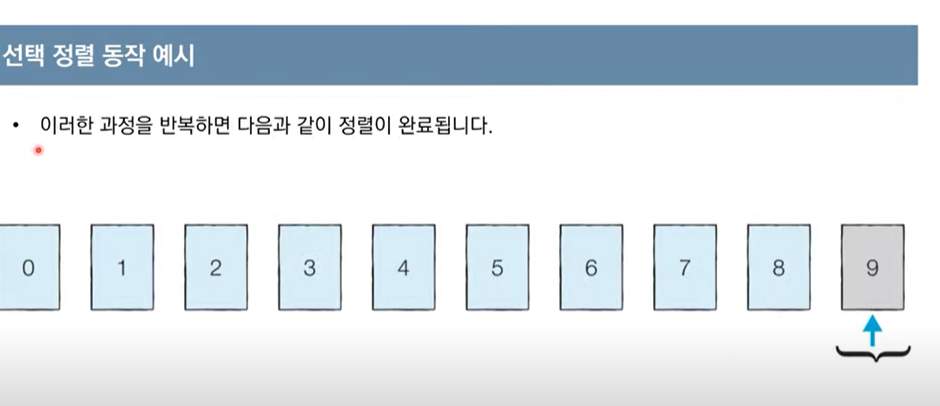
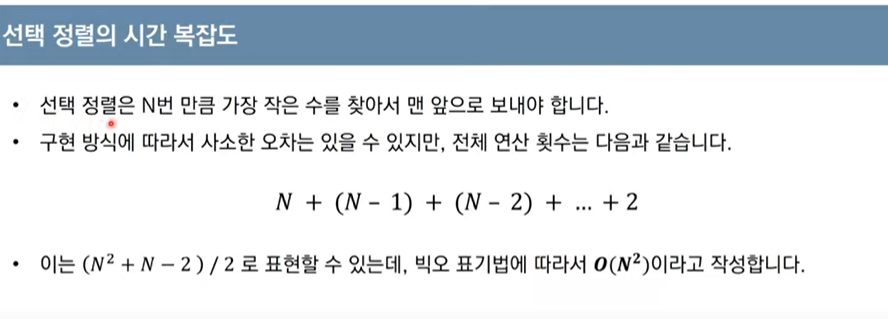

In [1]:
array = [7, 5, 9, 0, 3, 1, 6, 2, 4, 8]

for i in range(len(array)) :
    min_index = i # 가장 작은 원소의 인덱스
    for j in range(i+1, len(array)) :
        if array[min_index] > array[j] :
            min_index = j
    array[i], array[min_index] = array[min_index], array[i] # 스왑
    
print(array)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


## 삽입정렬 

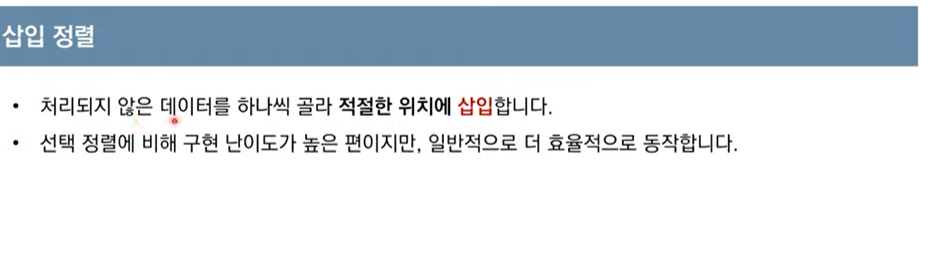
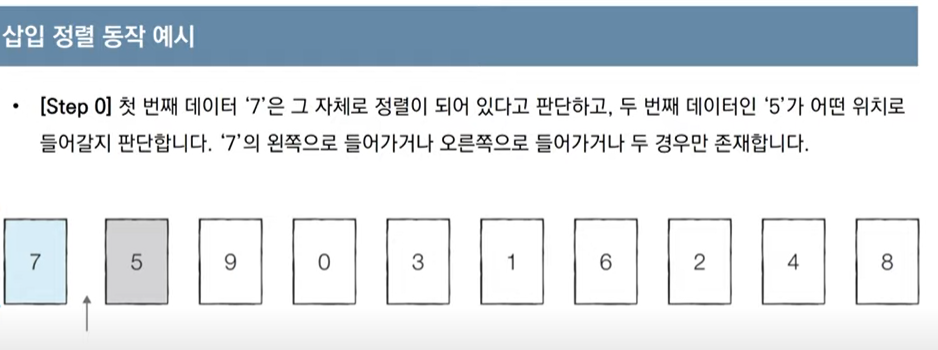
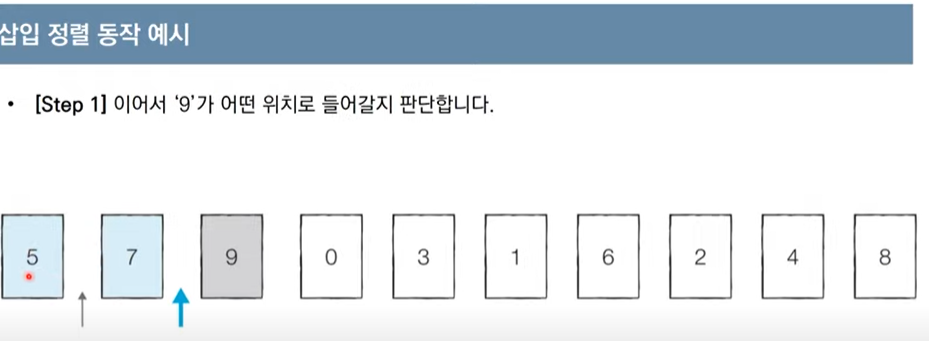
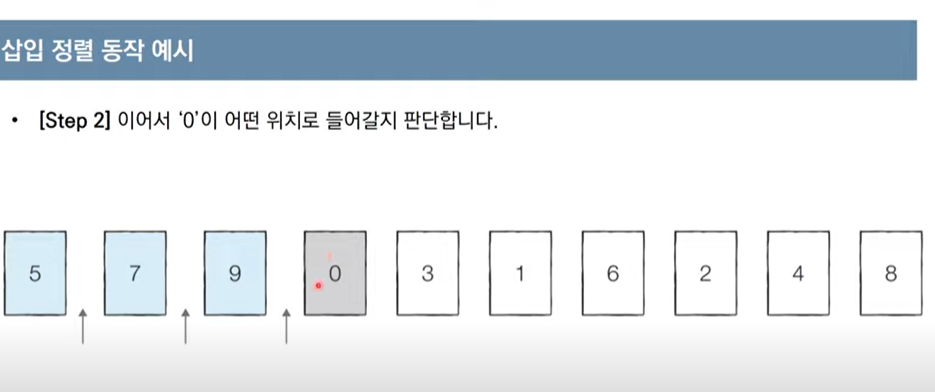
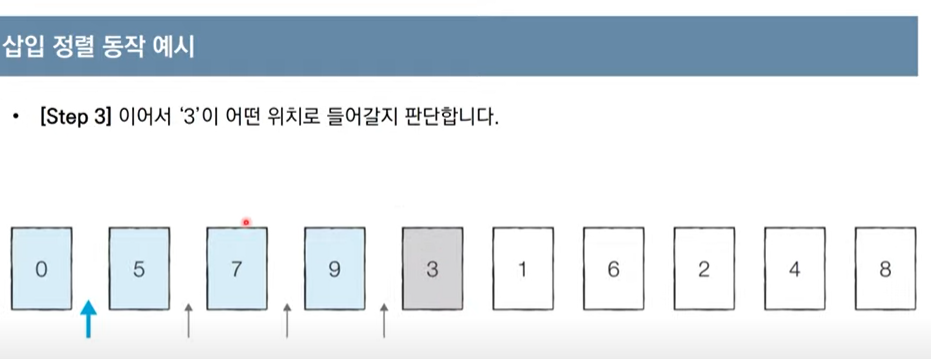
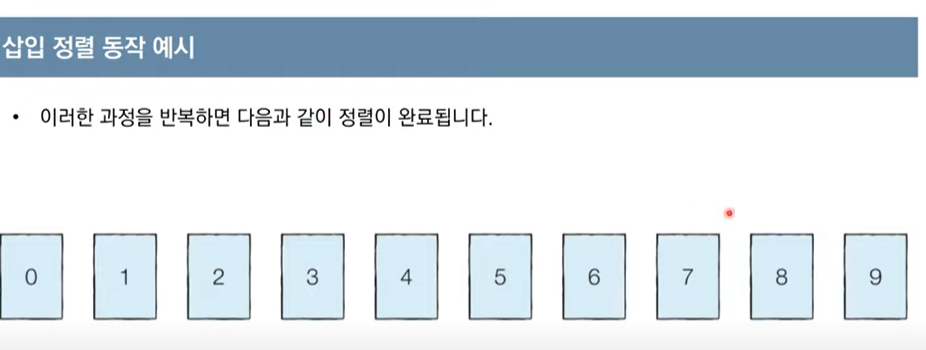
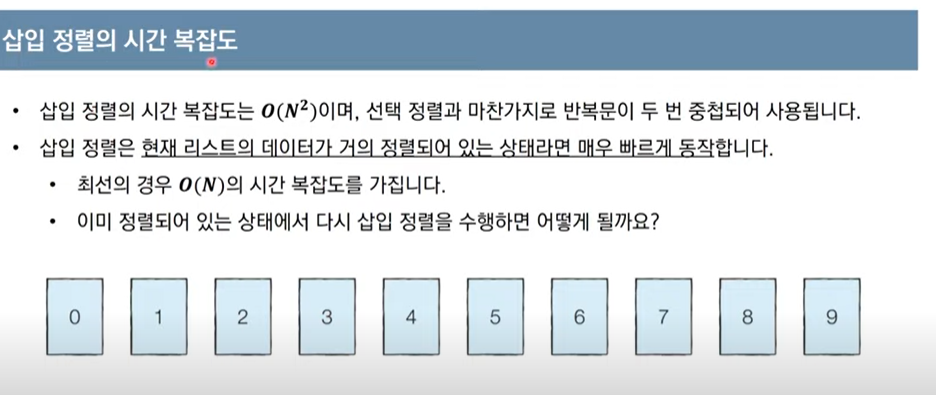

In [2]:
array = [7, 5, 9, 0, 3, 1, 6, 2, 4, 8]

for i in range(1, len(array)) :
    for j in range(i, 0, -1) : # 인덱스 i부터 1까지 1씩 감소하며 반복
        if array[j] < array[j-1] : # 한 칸씩 왼쪽으로 이동
            array[j], array[j-1] = array[j-1], array[j]
        else : # 자기보다 작은 데이터를 만나면 그 위치에서 멈춤
            break
            
print(array)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


## 퀵정렬

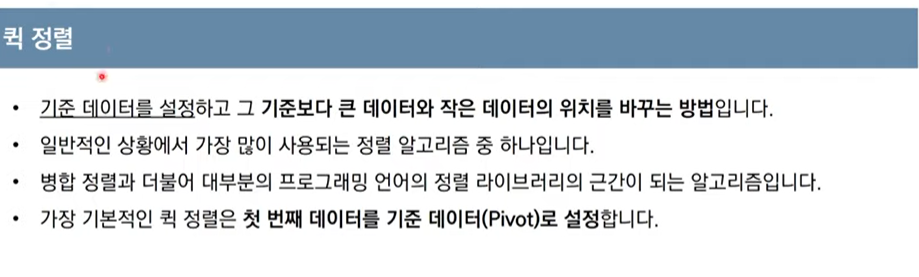
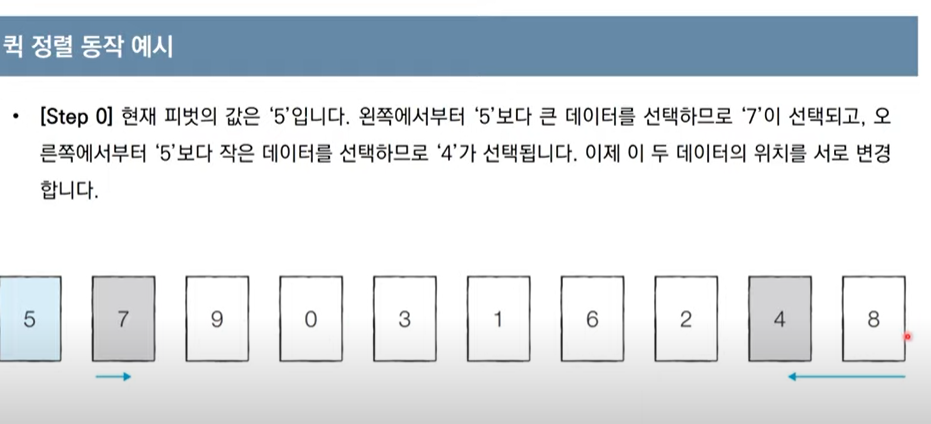
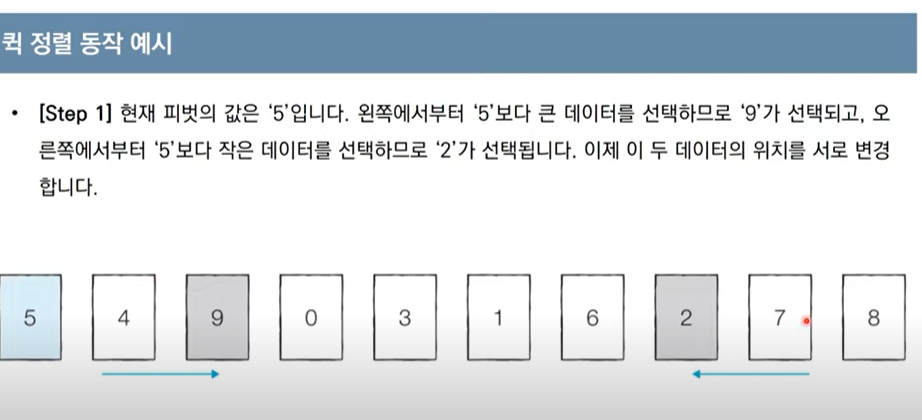
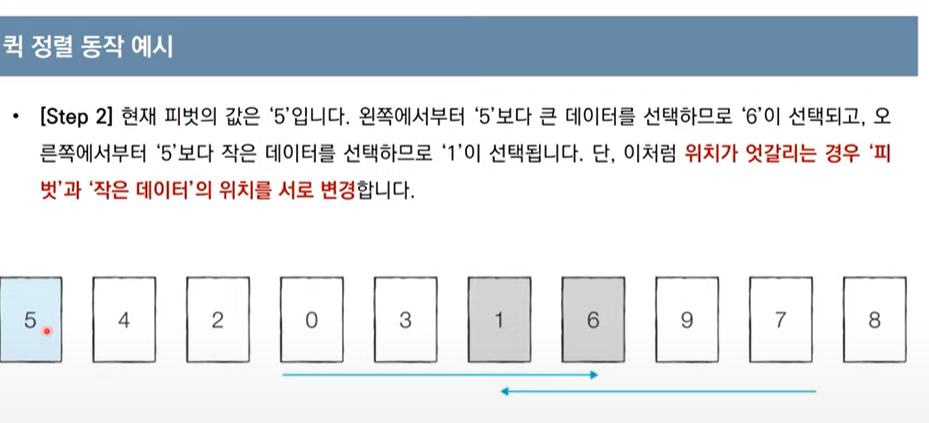
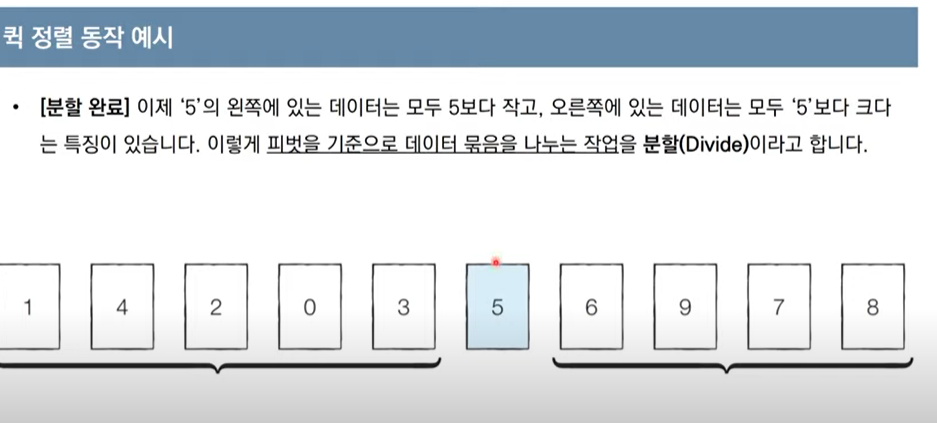
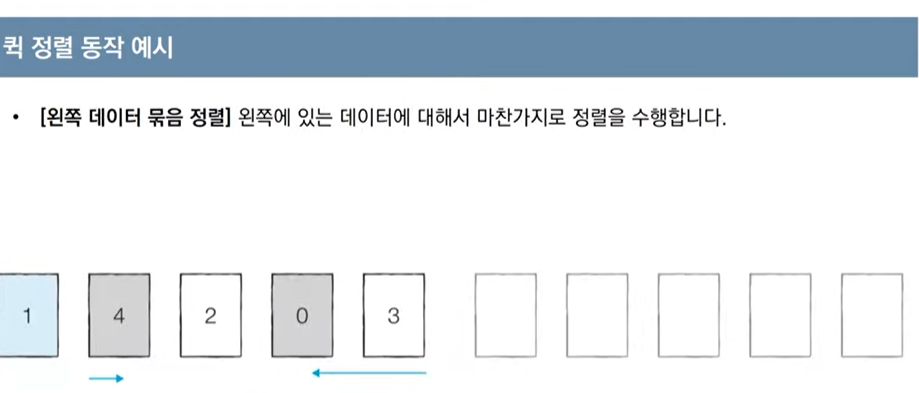
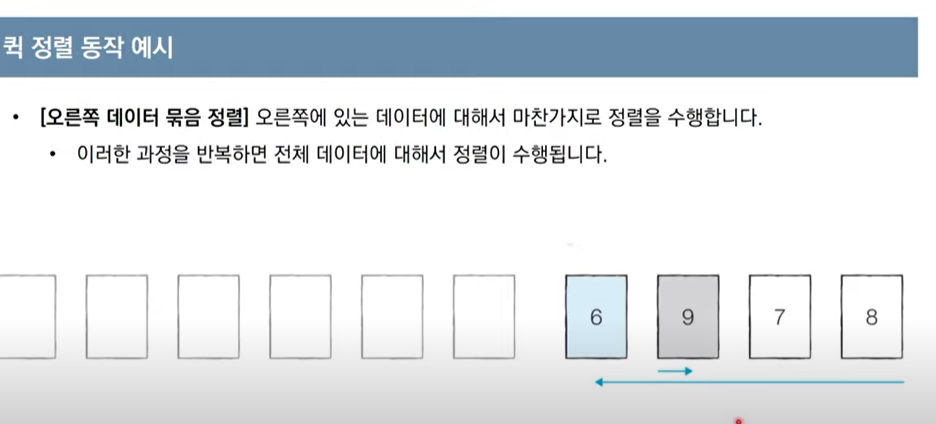
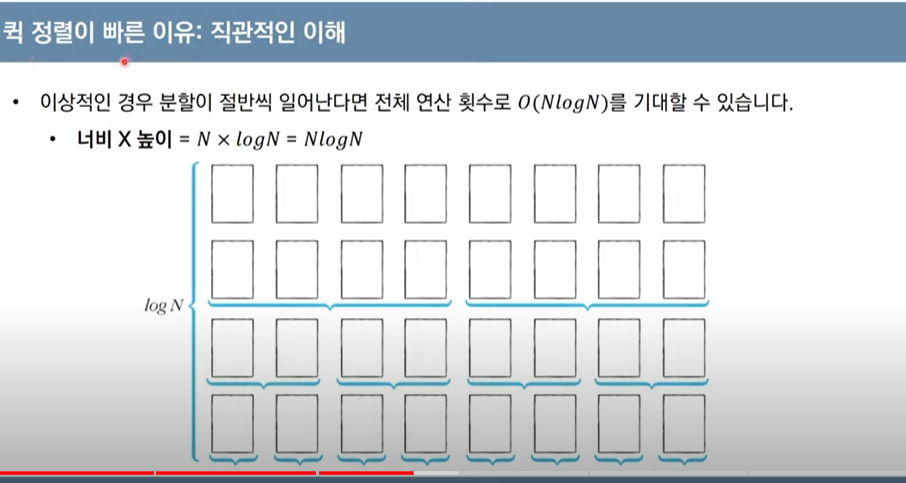
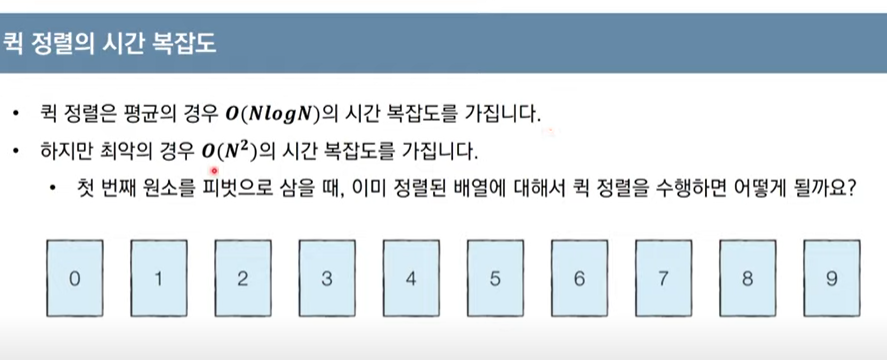

### 일반적인 방식 

In [6]:
array = [5, 7, 9, 0, 3, 1, 6, 2, 4, 8]

def quick_sort(array, start, end) :
    if start >= end : # 원소가 1개인 경우 종료
        return
    pivot = start # 피벗은 첫 번째 원소
    left = start + 1
    right = end
    
    while (left <= right) :
        # 피벗보다 큰 데이터를 찾을 때까지 반복
        while (left <= end and array[left] <= array[pivot]) :
            left += 1
        # 피벗보다 작은 데이터를 찾을 때까지 반복
        while (right > start and array[right] >= array[pivot]) :
            right -= 1
        if (left > right) : # 엇갈렸다면 작은 데이터와 피벗을 교체
            array[right], array[pivot] = array[pivot], array[right]
        else : # 엇갈리지 않았다면 작은 데이터와 큰 데이터를 교체
            array[left], array[right] = array[right], array[left]
        # 분할 이후 왼쪽 부분과 오른쪽 부분에서 각각 정렬 수행
        quick_sort(array, start, right-1)
        quick_sort(array, right+1, end)
        
quick_sort(array, 0, len(array)-1)
print(array)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


### 파이썬의 장점을 살린 방식

In [7]:
array = [5, 7, 9, 0, 3, 1, 6, 2, 4, 8]

def quick_sort(array) :
    # 리스트가 하나 이하의 원소만을 담고 있다면 종료
    if len(array) <= 1 :
        return array
    pivot = array[0] # 피벗은 첫 번째 원소
    tail = array[1:] # 피벗을 제외한 리스트
    
    left_side = [x for x in tail if x <= pivot] # 분할된 왼쪽 부분
    right_side = [x for x in tail if x > pivot] # 분할된 오른쪽 부분
    
    # 분할 이후 왼쪽 부분과 오른쪽 부분에서 각각 정렬 수행하고, 전체 리스트 반환
    return quick_sort(left_side) + [pivot] + quick_sort(right_side)

print(quick_sort(array))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


## 계수 정렬

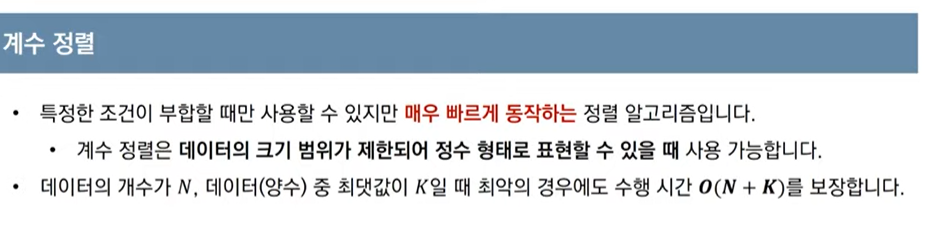
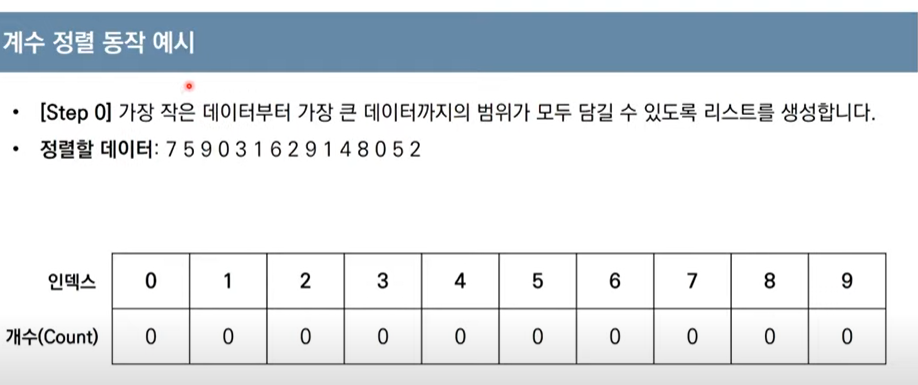
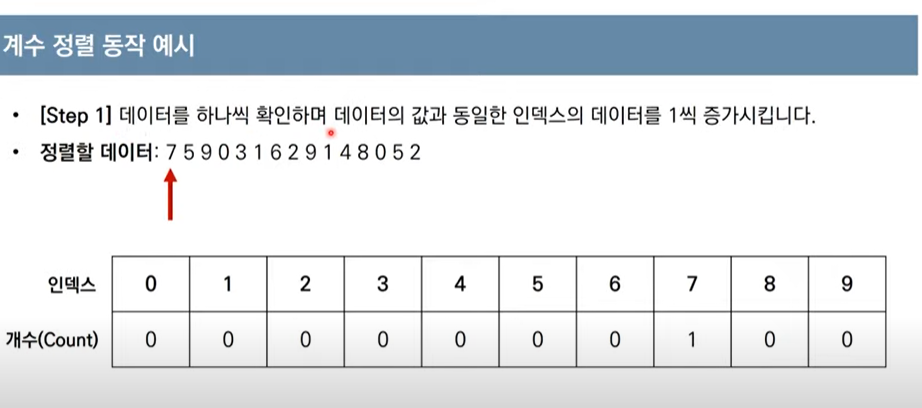
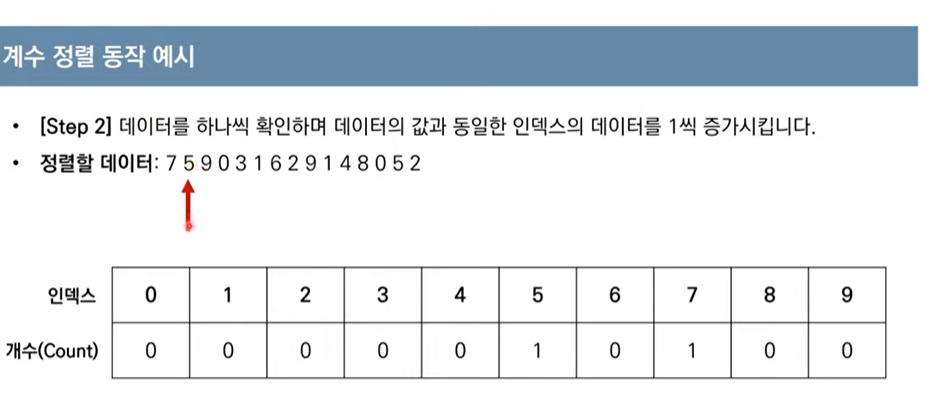
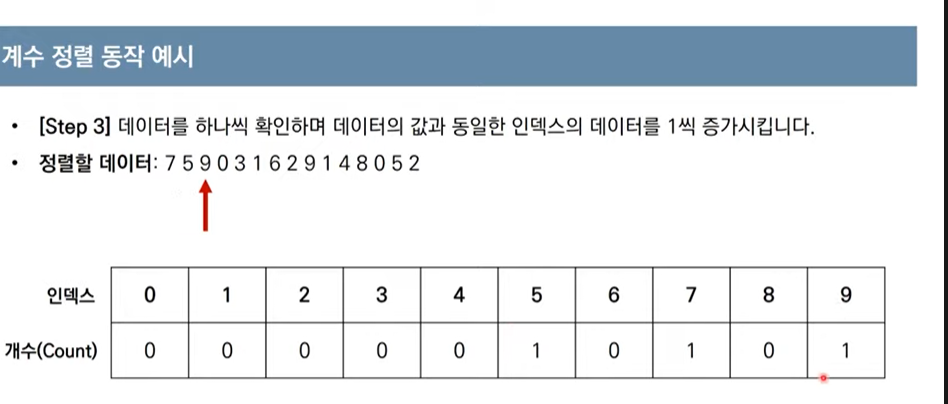
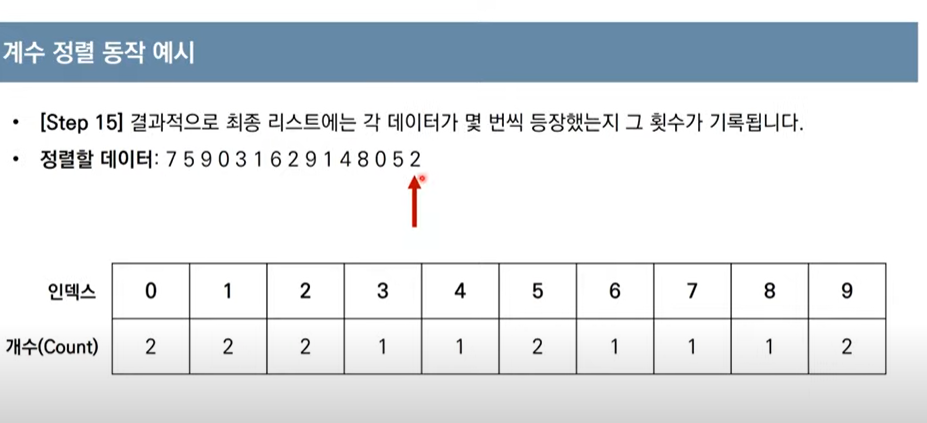
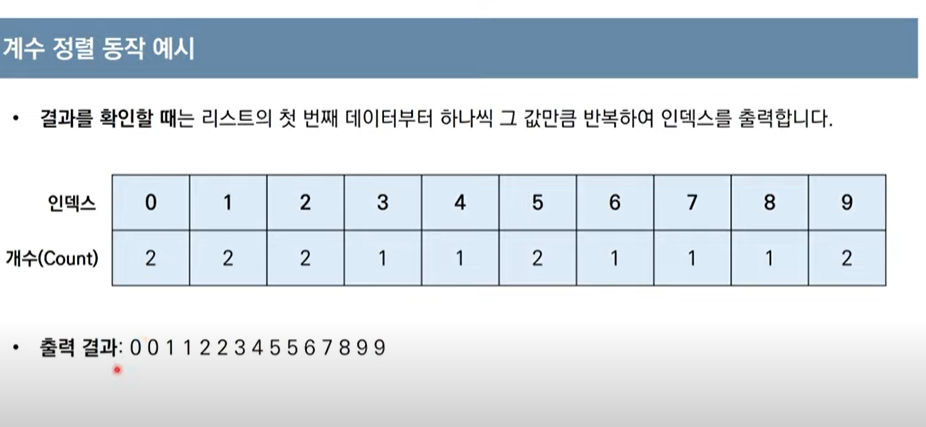
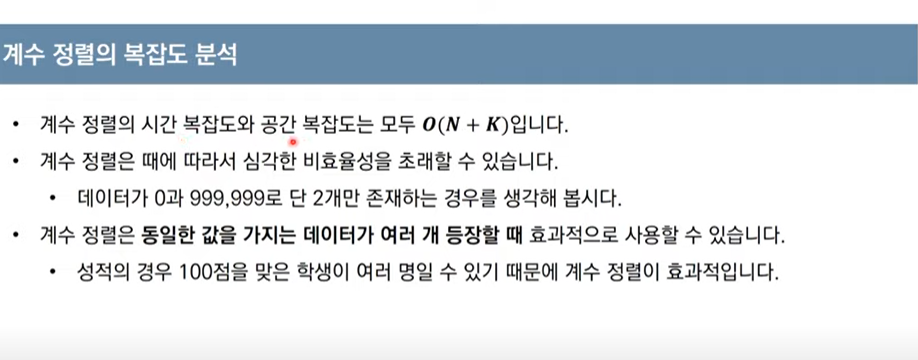

In [8]:
# 모든 원소의 값이 0보다 크거나 같다고 가정
array = [7, 5, 9, 0, 3, 1, 6, 2, 9, 1, 4, 8, 0, 5, 2]
# 모든 범위를 포함하는 리스트 선언(모든 값은 0으로 초기화)
count = [0] * (max(array) + 1)

for i in range(len(array)) :
    count[array[i]] += 1 # 각 데이터에 해당하는 인덱스의 값 증가
    
for i in range(len(count)) : # 리스트에 기록된 정렬 정보 확인
    for j in range(count[i]) :
        print(i, end= ' ') # 띄어쓰기를 구분으로 등장한 횟수만큼 인덱스 출력

0 0 1 1 2 2 3 4 5 5 6 7 8 9 9 

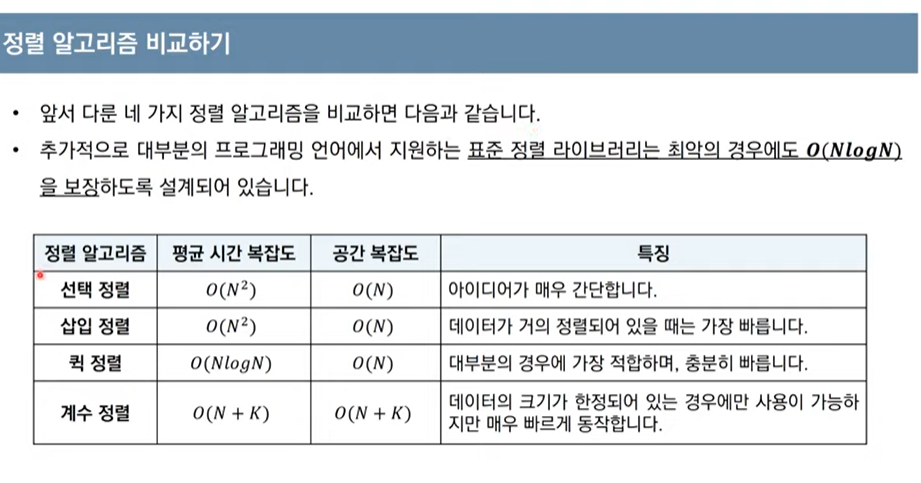

## 선택 정렬과 기본 정렬 라이브러리 수행 시간 비교

In [9]:
from random import randint
import time

# 배열에 10,000개의 정수를 삽입
array = []
for _ in range(10000) :
    # 1부터 100 사이의 랜덤한 정수
    array.append(randint(1, 100))

# 선택 정렬 프로그램 성능 측정
start_time = time.time()

# 선택 정렬 프로그램 소스코드
for i in range(len(array)) :
    min_index = i # 가장 작은 원소의 인덱스
    for j in range(i+1, len(array)) :
        if array[min_index] > array[j] :
            min_index = j
        array[i], array[min_index] = array[min_index], array[i]
        
# 측정 종료
end_time = time.time()

# 수행 시간 출력
print("선택 정렬 성능 측정 :", end_time - start_time)

# 배열을 다시 무작위 데이터로 초기화
array = []
for _ in range(10000) :
    # 1부터 100 사이의 랜덤한 정수
    array.append(randint(1, 100))
    
# 기본 정렬 라이브러리 성능 측정
start_time = time.time()

# 기본 정렬 라이브러리 사용
array.sort()

# 측정 종료
end_time = time.time()

# 수행 시간 출력
print("기본 정렬 라이브러리 성능 측정 :", end_time - start_time)

선택 정렬 성능 측정 : 15.9174165725708
기본 정렬 라이브러리 성능 측정 : 0.0009980201721191406


# -----------------------------------------------------------

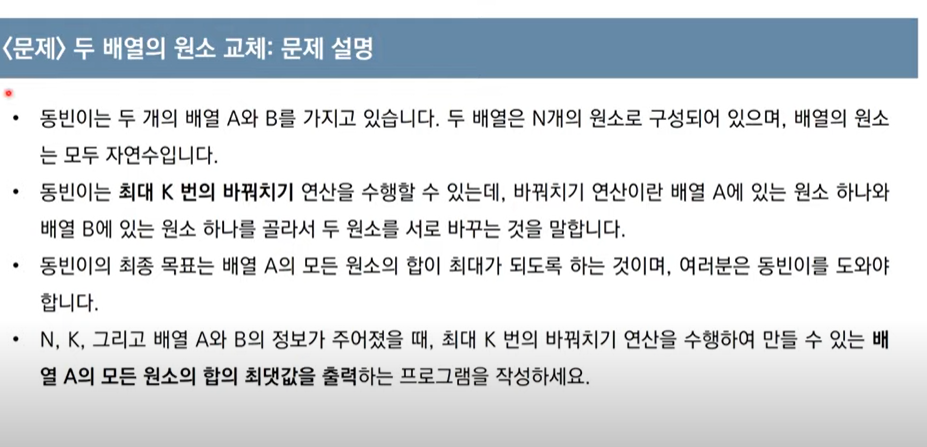
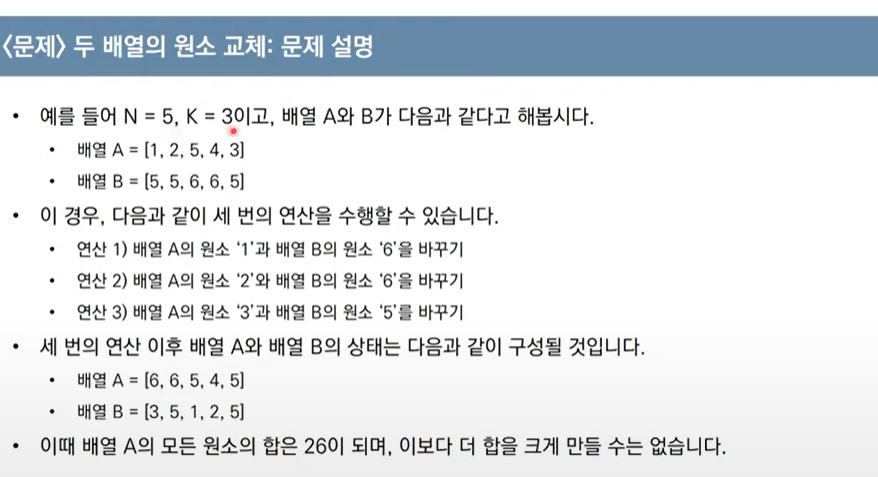
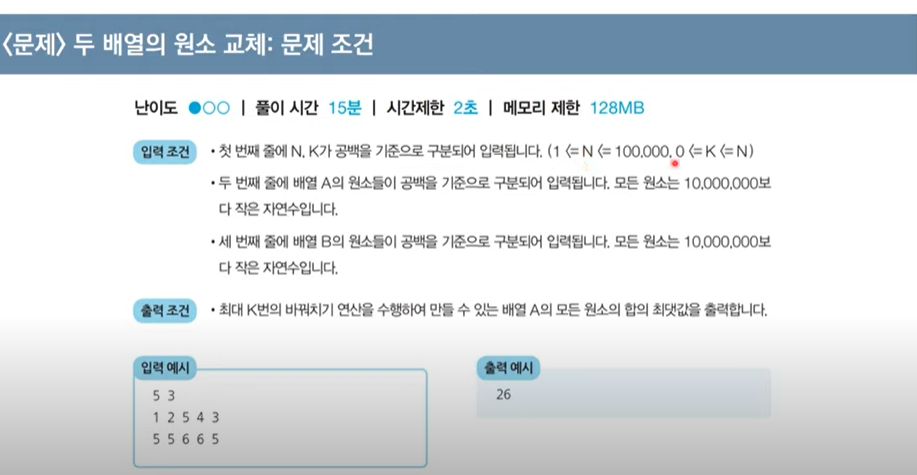
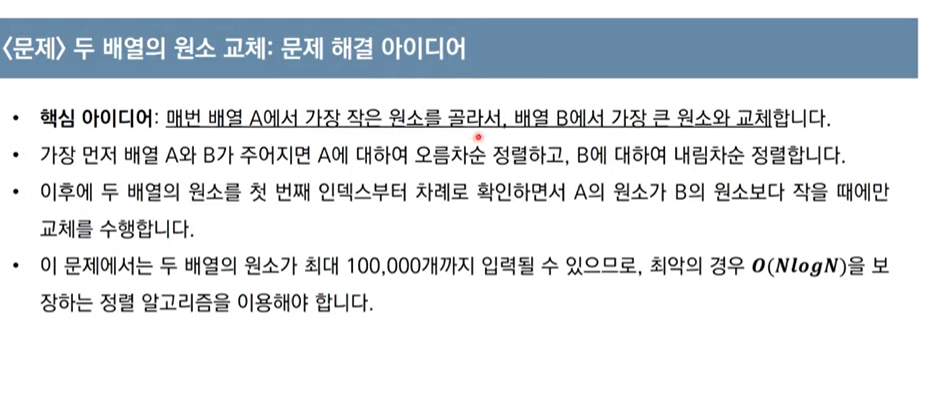

In [16]:
n, k = map(int, input().split())
a = list(map(int, input().split()))
b = list(map(int, input().split()))

a.sort()
b.sort(reverse = True)

for i in range(k) :
    if a[i] < b[i] :
        a[i], b[i] = b[i], a[i]
    else :
        break

print(sum(a))

5 3
1 2 5 4 3
5 5 6 6 5
26
